<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/AlgoritmosMejoramietoDominioEspacial_Grupo9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 2

Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

<h4>Procedimiento “Unsharp masking”</h4>
<p>
Es un procedimiento que se realiza para conseguir un afilamiento de la imagen. Es un método que se utiliza desde las practicas de revelación de fotografías en un cuarto oscuro. La imagen original se suavizaba intencionalmente para conseguir un efecto de imagen desajustada. Después, la imagen desajustada era aplicada a la original. En procesamiento de imágenes el algoritmo es el siguiente:
</p>

<ol>
<li>
Suaviza la imagen
</li>
<li>
Sustrae la imagen suavizada de la original para obtener la “mascara”
</li>
<li>
Agrega la imagen original
</li>
</ol>


In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import io

from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

import urllib
import skimage
from scipy.signal import convolve2d
from scipy import ndimage
from skimage import exposure


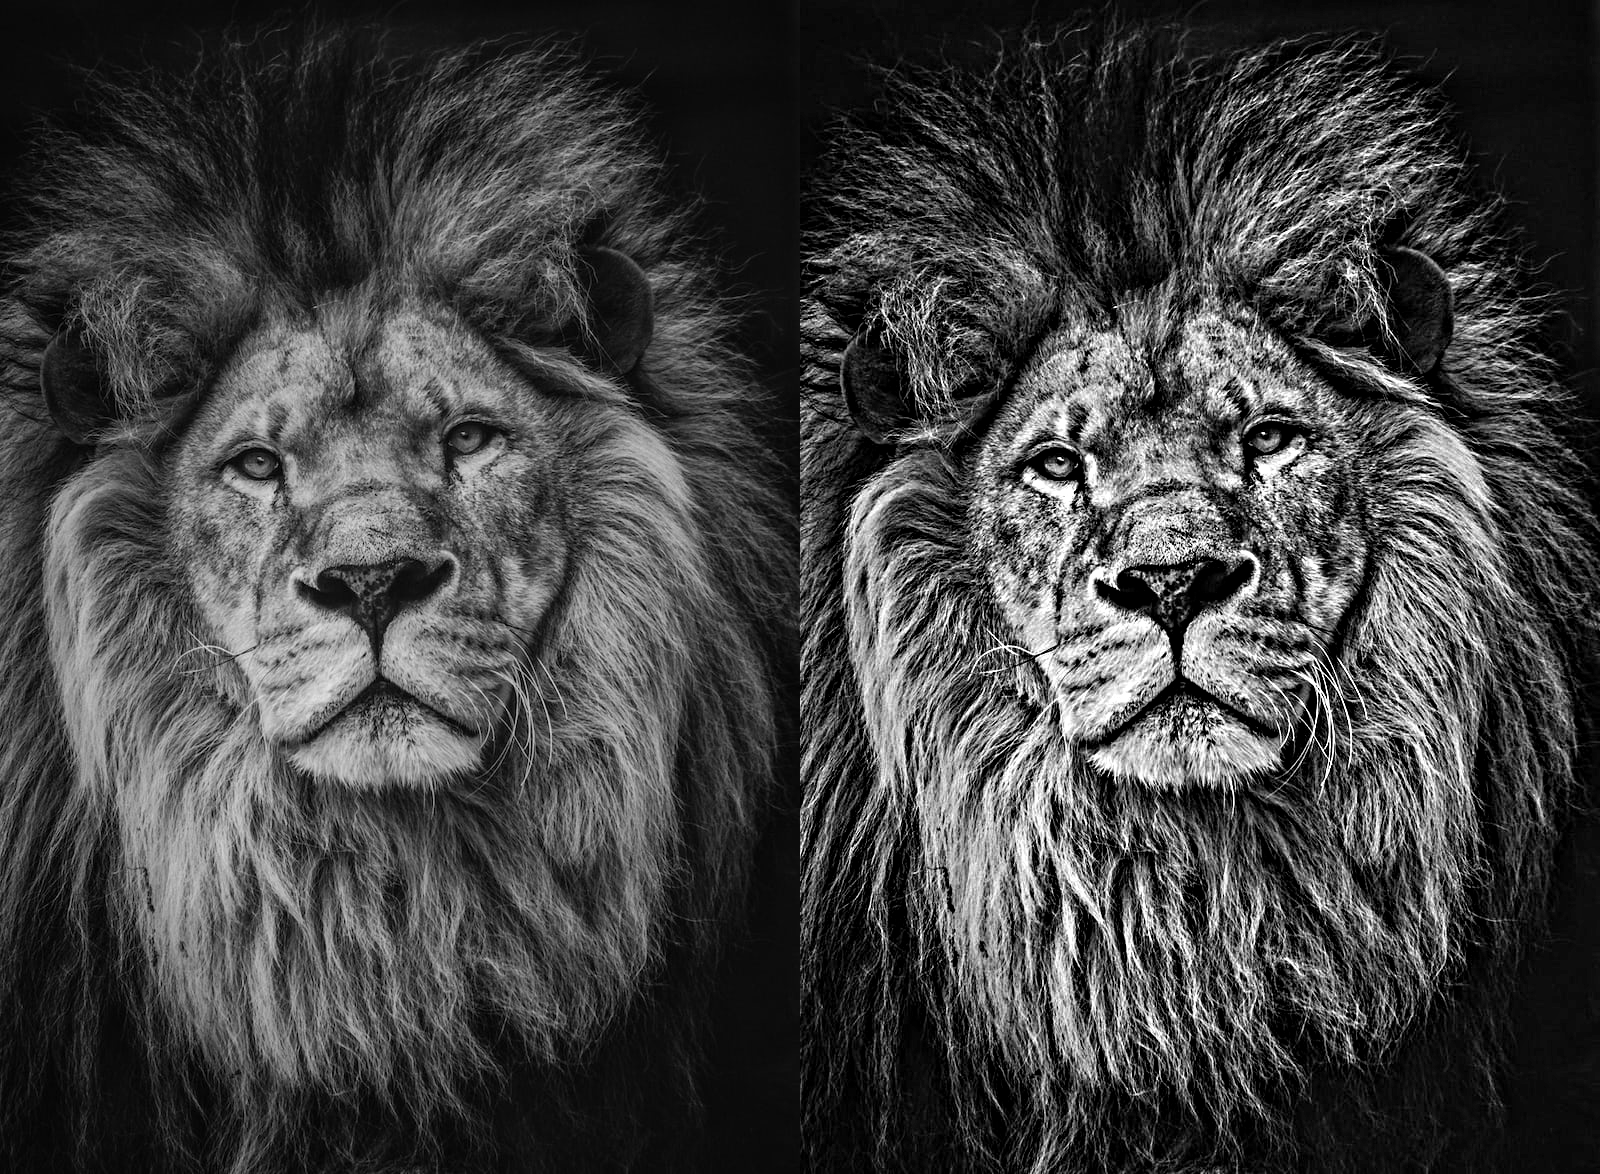

In [ ]:


# Descargamos la imagen
url = 'https://images.unsplash.com/photo-1543682704-15adeb008ac4?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MjR8fGJsYWNrJTIwYW5kJTIwd2hpdGV8ZW58MHx8MHx8&auto=format&fit=crop&w=800&q=60'
urllib.request.urlretrieve(url, "image.jpg")
original_image = Image.open('image.jpg')
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Definimos la funcion que calcula el kernel gaussiano
def gaussian_kernel(size, sigma):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

# Definimos el algoritmo que realiza la convolucion con kernel gaussianos separables
def gaussConvolutionBlur(img,sigma=3,kernelSize=50):

  # Creamos un Kernel con distribucion Gaussiana que usaremos para suavisar la imagen
  gaussKernel = gaussian_kernel(kernelSize,sigma)

  # Usamos SVD para obtener los kernel separables y mejorar la complejidad del algoritmo
  U, S, V  = np.linalg.svd(gaussKernel)
  singular_value = S[0]
  horizontalKernel = (-1)*U[:, 0] *(np.sqrt(singular_value))
  verticalKernel = (-1)*V[0, :]*(np.sqrt(singular_value))
  
  #Podemos comprobar que la matriz resultante de aplicar outer product es la original
  #np.outer(horizontal_kernel,vertical_kernel)


  # Definimos el margen de la imagen
  padding = kernelSize//2

  # Agreamos padding a nuestra imagen para procesarla con el kernel
  paddingImage = img.copy()
  paddingImage = np.pad(paddingImage,(padding,padding),mode='reflect')

  # Creamos un npArray que utilizaremos para guardar la imagen convolucionada
  convolutedImage = np.zeros(img.shape)

  # Aplicamos la convolucion
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      imageWindow = paddingImage[y:y+(2*padding)+1,x:x+(2*padding)+1]
      # Convolucion 1 kernel separable horizontal
      convolution = np.dot(horizontalKernel,imageWindow.T)
      # Convolucion 2 kernel separable vectical
      convolution = np.dot(verticalKernel,convolution.T)
      # Asignamos el producto en la imagen resultante
      convolutedImage[y][x] = convolution
  return convolutedImage

# Aplica la convolución entre la matriz y el vector
blurredImage = gaussConvolutionBlur(image,10)

# Restamos la imagen suavisada a la original y obtenemos la Mascara
mask = image - blurredImage

weight = 1.5
# Agregamos la mascara a la original con peso
sharpened = image + (weight * mask)

# Desplegamos la imagen
horizontalDisplayImgs = np.concatenate((image,sharpened),axis=1)
cv2_imshow(horizontalDisplayImgs,)





<h4>Comparacion con filtro Laplaciano</h4>

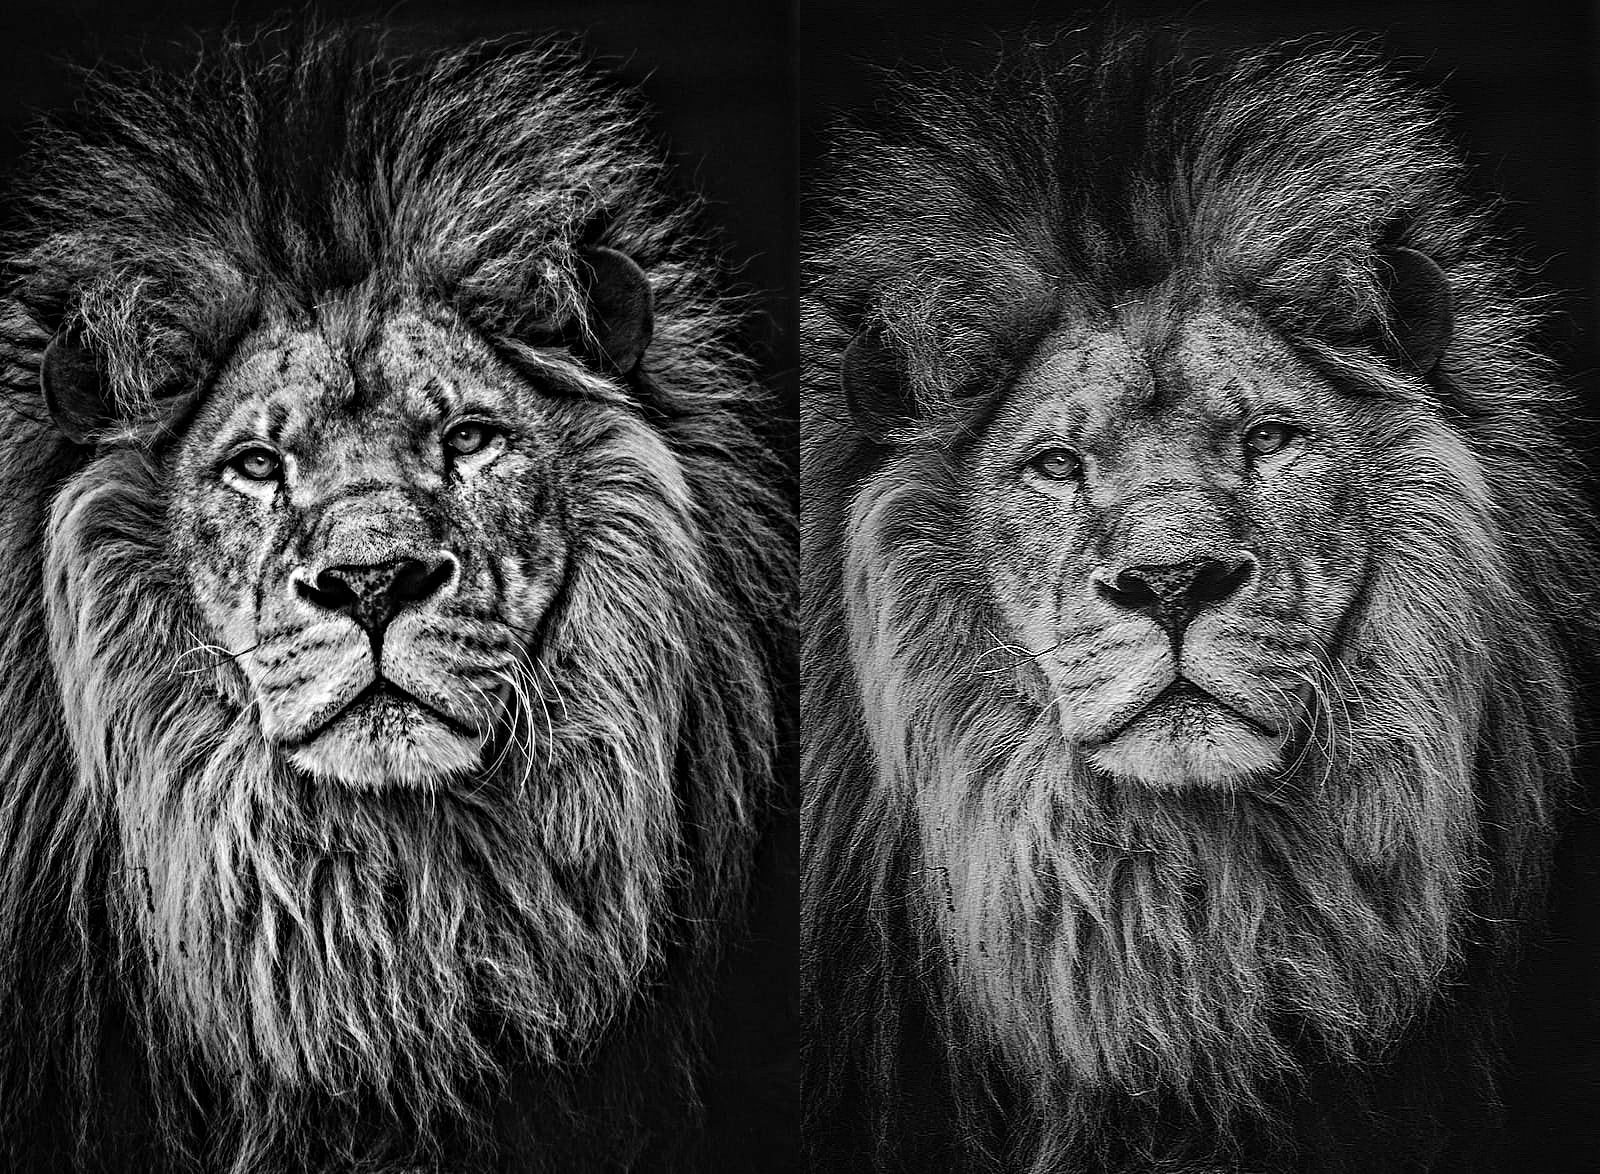

In [ ]:
def convolve(img,kernel):
  # Definimos el margen de la imagen
  padding = kernel.shape[0]//2

  # Agreamos padding a nuestra imagen para procesarla con el kernel
  paddingImage = img.copy()
  paddingImage = np.pad(paddingImage,(padding,padding),mode='reflect')

  # Creamos un npArray que utilizaremos para guardar la imagen convolucionada
  convolutedImage = np.zeros(img.shape)

  # Aplicamos la convolucion
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      imageWindow = paddingImage[y:y+(2*padding)+1,x:x+(2*padding)+1]
      # Convolucion
      convolution = np.dot(kernel,imageWindow).sum()
      # Asignamos en la imagen saliene
      convolutedImage[y][x] = convolution
  return convolutedImage


# Compute laplacian convolution
laplacianKernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
laplacian = convolve(image,laplacianKernel)

# Dado que el centro del kernel laplaciano es positivo, lo sumamos a la imagen original
unsharpLaplacian = image+(0.3*laplacian)

# Desplegamos la imagen
horizontalDisplayImgs = np.concatenate((sharpened,unsharpLaplacian),axis=1)
cv2_imshow(horizontalDisplayImgs,)




<h3>Referencias</h3>
<ul>
<li>
Gonzalez, R. C., & Woods, R. E. (2018). Digital Image Processing (4th ed.). Prentice-Hall.
</li>
<li>
Wikipedia Contributors. (2021, February 23). Unsharp masking. In Wikipedia, The Free Encyclopedia. Retrieved February 26, 2021, from https://en.wikipedia.org/wiki/Unsharp_masking
</li>
<li>
Wronski, B. (2020, February 3). Separate Your Filters: SVD and Low-Rank Approximation of Image Filters. BartWronski.com. Retrieved February 26, 2021, from https://bartwronski.com/2020/02/03/separate-your-filters-svd-and-low-rank-approximation-of-image-filters/
</li>
</ul>